<a href="https://colab.research.google.com/github/felpscunha/projects_datascience/blob/main/portoseguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas e Arquivos

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# XGBOOST

from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
metadata = pd.read_csv('/content/metadata.csv')
submisssion = pd.read_csv('/content/submission_sample.csv')

# Análise Exploratória dos Dados

In [ ]:
df_train.head(1)

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
0,1,18,19,2853,29442,1386,2435,35,-999,3,63,6498,1166,2007,26,13,11,11,4,1547,26,2068,1,3,0,4,7,0,24,4,2,0,16,3,44,463,27,2,0,4,9,3,25,6,1,4,3,1,0,0,0,0,42,1,1,0.212414,0.137,0.833333,0.037822,0.05807,0.311441,0.142303,0.056146,0.632694,0.024054,0.253356,0.00603,0.132353,0.139706,1


In [ ]:
df_train.shape

(11965, 70)

In [ ]:
df_train.info()

In [ ]:
df_train.duplicated().sum()

# Outliers

In [ ]:
# outliers detection with z-score
from scipy import stats

z_score = np.abs(stats.zscore(df_train))
print(z_score)

[[1.7049619  1.14004532 0.02273846 ... 0.20768543 0.04756248 1.98882845]
 [1.70427888 0.78586197 0.39388637 ... 0.20775923 0.0468766  0.50280858]
 [1.70213227 1.33612119 0.06882743 ... 0.20894002 0.04969631 0.50280858]
 ...
 [1.73937613 2.37812857 0.09171891 ... 0.20901382 0.04794352 0.50280858]
 [1.73966885 0.78586197 0.29774217 ... 0.20834963 0.04733385 0.50280858]
 [1.73986399 1.55273973 0.13292356 ... 0.20790683 0.04733385 0.50280858]]


In [ ]:
outliers_z = np.where(z_score > 3)

In [ ]:
df_train_out_z = df_train[(z_score < 3).all(axis=1)]

In [ ]:
df_train_out_z.shape

(9013, 70)

# Balanceamento dos Dados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


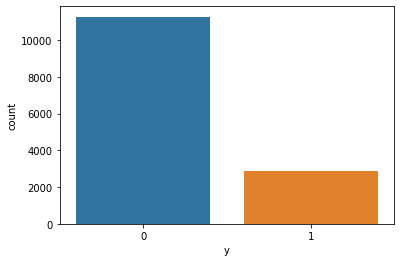

In [ ]:
sns.countplot(df_train['y'])

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority', random_state=5)
x_over, y_over = oversampler.fit_resample(df_train.drop(['id','y'], axis=1), df_train['y'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df_train_over = pd.DataFrame(x_over)
df_train_over.shape

(22546, 68)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


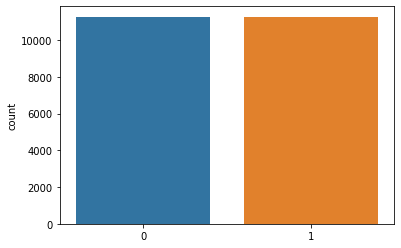

In [ ]:
sns.countplot(y_over)

## Balanceamento Parte 2

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

bsmoter = BorderlineSMOTE(sampling_strategy='minority', random_state=5)
x_over, y_over = bsmoter.fit_resample(df_train_out_z.drop(['id','y'], axis=1), df_train_out_z['y'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
df_train_over = pd.DataFrame(x_over)
df_train_over.shape

(14268, 68)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


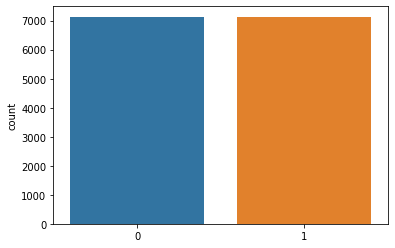

In [ ]:
sns.countplot(y_over)

# Modelo + Pré-processamentos

In [ ]:
X = df_train_over.drop(['id', 'y'], axis = 1)
y = df_train_over['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_over, y_over, test_size=.20, random_state=5)

In [ ]:
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train, y_train)
predictions_1st = rfc.predict(X_test)

In [ ]:
print(f'Baseline model accuracy: {accuracy_score(y_test, predictions_1st)}')
print(f'Baseline model f1-score: {f1_score(y_test, predictions_1st)}')

Baseline model accuracy: 0.8657792567942318
Baseline model f1-score: 0.5953177257525083


# Scaling variables

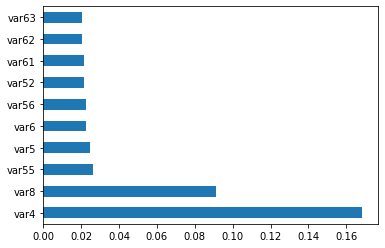

In [ ]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
X_test_scaled.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,-0.478123,1.592859,-0.191564,-0.489553,0.462833,0.929458,0.319752,0.382182,0.165833,0.349214,-0.40029,-0.521199,1.074423,0.379715,0.880574,0.859591,0.840812,0.86339,0.447636,0.363126,1.041302,0.878456,1.265938,1.149542,-1.443349,0.111806,-0.776316,0.834839,1.259792,1.08757,0.0,1.642454,0.401214,-0.736092,-0.833089,-0.941468,0.962165,-0.444664,0.35119,1.014573,-0.147415,-0.589207,0.301416,0.390913,-0.268716,-0.265136,0.0,-0.182312,-0.740027,-0.461871,0.0,0.113905,0.356363,0.594246,-0.377462,0.193859,0.195012,0.096777,0.275936,0.851679,0.058933,-0.762186,-1.510468,-0.238264,-0.284491,-0.284491,0.65682,-0.913117


In [ ]:
rfc = RandomForestClassifier(random_state=5)
rfc.fit(X_train_scaled, y_train)
predictions_2nd = rfc.predict(X_test_scaled)

In [ ]:
print(f'Scaled model accuracy: {accuracy_score(y_test, predictions_2nd)}')
print(f'Scaled model f1-score: {f1_score(y_test, predictions_2nd)}')

Scaled model accuracy: 0.8624514697726012
Scaled model f1-score: 0.5753424657534246


# XGBOOST

In [ ]:
xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_3nd = xgb_model.predict(X_test)

In [ ]:
print(f'XGB model accuracy: {accuracy_score(y_test, predictions_3nd)}')
print(f'XGB model f1-score: {f1_score(y_test, predictions_3nd)}')

XGB model accuracy: 0.8696616749861342
XGB model f1-score: 0.6423135464231354


In [ ]:
xgb_pred = xgb_model.predict(df_test_copy)

NameError: ignored

In [ ]:
ids = df_test['id']
submission = {'id':ids, 'predicted':xgb_pred}
xgb_submission = pd.DataFrame(submission)

In [ ]:
xgb_submission.to_csv('submission_05.csv', index=False)

# XGBOOST Scaling variables

In [ ]:
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_4nd = xgb_model.predict(X_test_scaled)

In [ ]:
print(f'XGB model w/ scaling accuracy: {accuracy_score(y_test, predictions_4nd)}')
print(f'XGB model w/ scaling f1-score: {f1_score(y_test, predictions_4nd)}')

XGB model w/ scaling accuracy: 0.8635607321131448
XGB model w/ scaling f1-score: 0.6317365269461078


In [ ]:
xgb_pred_scaled = xgb_model.predict(df_test_scaled)

In [ ]:
ids = df_test['id']
submission = {'id':ids, 'predicted':xgb_pred_scaled}
xgb_scaled_submission = pd.DataFrame(submission)

In [ ]:
xgb_scaled_submission.to_csv('submission_09.csv', index=False)

# Boosting model

In [ ]:
a_grid = {'learning_rate':[0.1, 0.2, 0.3],
              'n_estimators':[100, 250, 500, 1000, 2000],
              'max_depth':[3, 5, 10]
          }

In [ ]:
a_grid

{'learning_rate': [0.1, 0.2, 0.3],
 'max_depth': [3, 5, 10],
 'n_estimators': [100, 250, 500, 1000, 2000]}

In [ ]:
grid_1 = GridSearchCV(estimator=xgb_model, param_grid=a_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [100, 250, 500, 1000, 2000]}

In [ ]:
grid_1.best_params_, grid_1.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
 0.8704400421492823)

In [ ]:
b_grid = {'learning_rate':[0.05, 0.1],
              'n_estimators':[50, 100, 150],
              'max_depth':[2, 3, 4]
          }

In [ ]:
grid_2 = GridSearchCV(estimator=xgb_model, param_grid=b_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             pre_dispatch='2*n_jobs', ref

In [ ]:
grid_2.best_params_, grid_2.best_score_

({'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100},
 0.8704400421492823)

In [ ]:
c_grid = {'n_estimators':[250, 300, 350], 'max_depth':[1, 2, 3]
          }

In [ ]:
grid_3 = GridSearchCV(estimator=xgb_model, param_grid=c_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_3.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3],
                         'n_estimators': [250, 300, 350]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=F

In [ ]:
grid_3.best_params_, grid_3.best_score_

({'max_depth': 2, 'n_estimators': 350}, 0.8822688888219687)

In [ ]:
d_grid = {'min_child_weight':[1, 3, 5], 'max_depth':[2, 3, 4]}

In [ ]:
grid_4 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1), param_grid=d_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_4.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'min_child_weight': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=

In [ ]:
grid_4.best_params_, grid_4.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.8720056445594527)

In [ ]:
e_grid = {'gamma':[0.0, 0.1, 0.2, 0.3, 0.4]}

In [ ]:
grid_5 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1), param_grid=e_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_5.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=

In [ ]:
grid_5.best_params_, grid_5.best_score_

({'gamma': 0.0}, 0.8720056445594527)

In [ ]:
f_grid = {'subsample':[0.6, 0.7, 0.8, 0.9], 'colsample_bytree':[0.6, 0.7, 0.8, 0.9]} 

In [ ]:
grid_6 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1), param_grid=f_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_6.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0.0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=3,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True

In [ ]:
grid_6.best_params_, grid_6.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.8738219200186643)

In [ ]:
g_grid = {'reg_alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]} 

In [ ]:
grid_7 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=3,
                                     missing=None, n_estimators=350, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.7, verbosity=1), param_grid=g_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_7.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=3,
                                     missing=None, n_estimators=350, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.7, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='

In [ ]:
grid_7.best_params_, grid_7.best_score_

({'reg_alpha': 0.0001}, 0.8830146117171019)

In [ ]:
h_grid = {'reg_alpha':[0.000001, 0.00001, 0.0001, 0.0002]} 

In [ ]:
grid_8 = GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=3,
                                     missing=None, n_estimators=350, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0.0001, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.7, verbosity=1), param_grid=h_grid, scoring='roc_auc', n_jobs=-1, cv=3)
grid_8.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0.3,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=3,
                                     missing=None, n_estimators=350, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0.0001,
                                     reg_lambda=1, scale_pos_weight=1,
                                     seed=None, silent=None, subsample=0.7,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'reg_alpha': [1e-06, 1e-05, 0.0001, 0.0002]},
             pre_dispatch='2*n_jobs', refit=True, return_tr

In [ ]:
grid_8.best_params_, grid_8.best_score_

({'reg_alpha': 1e-06}, 0.8830151936311831)

In [ ]:
xgb_tuned = XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1)

In [ ]:
xgb_tuned.fit(X_train_scaled, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
predictions_tuned = xgb_tuned.predict(X_test_scaled)

In [ ]:
print(f'XGB model w/ scaling accuracy: {accuracy_score(y_test, predictions_tuned)}')
print(f'XGB model w/ scaling f1-score: {f1_score(y_test, predictions_tuned)}')

XGB model w/ scaling accuracy: 0.5238262088297126
XGB model w/ scaling f1-score: 0.677427011630667


In [ ]:
final_tuned_pred = xgb_tuned.predict(df_test_scaled)

In [ ]:
submission_tuned = {'id':ids, 'predicted':final_tuned_pred}
xgb_tuned_submission = pd.DataFrame(submission_tuned)

In [ ]:
xgb_tuned_submission.to_csv('submission_11.csv', index=False)

# Treatment for test data

In [ ]:
df_test.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
0,0,5,126,1353,28956,743,1289,27,-999,1,33,4530,914,991,19,1,3,3,3,1155,19,1031,5,3,2,3,7,0,25,4,1,0,11,2,62,413,27,0,0,4,6,3,24,3,1,0,0,0,0,0,0,0,44,1,1,0.217528,0.272,0.367742,0.062900,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676
1,2,6,126,1446,7803,5151,935,35,-999,3,63,8731,1341,2033,26,58,58,22,5,1299,26,773,5,3,1,2,1,0,25,4,0,1,6,5,58,692,21,15,8,4,0,1,30,0,1,0,0,0,0,0,0,0,13,1,1,0.221968,0.853,0.053763,0.177047,0.072127,0.074555,0.217009,0.144403,0.892028,0.038323,-999.0,-999.0,0.147059,0.099265
2,4,5,44,243,4325,1109,1903,33,24,1,63,10131,914,1503,24,60,61,23,5,1294,24,1562,5,4,1,0,1,0,26,5,2,0,17,0,12,553,0,18,0,4,10,3,26,14,1,0,0,0,0,0,0,0,36,1,1,0.213224,0.632,0.101075,0.210879,0.324770,0.384992,0.330680,0.072864,0.930373,0.021052,-999.0,-999.0,0.294118,0.136029
3,7,4,53,419,743,7750,183,35,-999,3,14,636,5879,146,26,22,22,10,4,811,26,152,5,3,2,4,4,0,24,4,2,0,12,5,38,662,28,1,0,4,9,3,28,7,1,0,0,0,0,0,1,0,13,1,1,0.205044,0.117,0.935484,0.007068,0.131070,-999.000000,0.244936,0.158088,0.986882,0.022649,-999.0,-999.0,0.294118,0.220588
4,15,4,126,1863,22693,5625,965,9,-999,3,63,24967,4427,772,5,73,73,29,5,595,5,796,0,1,0,1,7,0,11,2,1,0,21,3,18,546,0,1,0,4,6,3,28,8,1,0,0,0,0,1,0,0,51,1,1,0.203750,0.079,0.967742,0.024989,0.225166,0.059940,0.252794,0.080405,0.944501,0.021806,-999.0,-999.0,0.352941,0.113971


In [ ]:
df_test_copy = df_test
df_test_copy = df_test_copy.set_index('id')
df_test_copy.head(1)

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,126,1353,28956,743,1289,27,-999,1,33,4530,914,991,19,1,3,3,3,1155,19,1031,5,3,2,3,7,0,25,4,1,0,11,2,62,413,27,0,0,4,6,3,24,3,1,0,0,0,0,0,0,0,44,1,1,0.217528,0.272,0.367742,0.0629,0.201839,0.353965,0.166641,0.049108,0.986882,0.016683,-999.0,-999.0,0.176471,0.253676


In [ ]:
df_test_scaled = scaler.fit_transform(df_test_copy)
df_test_scaled = pd.DataFrame(df_test_scaled)
df_test_scaled.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67
0,-0.647656,0.470626,-0.222311,1.365673,-1.454428,-0.039522,0.387077,-2.344794,0.347223,0.387203,-0.896135,-0.812767,-0.57825,-0.069236,0.224559,0.228664,0.296691,0.329637,0.17546,-0.113354,-0.542474,0.844888,0.417309,1.155203,0.630702,0.360998,-0.77861,0.695573,0.332932,-0.703343,-0.192775,-0.543567,-0.583662,1.885375,0.107485,1.00936,-0.857336,-0.464212,0.419319,-0.001453,-0.108983,-0.20218,-0.953764,0.399222,-0.309062,-0.284714,-0.18384,-0.220719,-0.729613,-0.413965,-0.237605,0.405907,-0.846231,-0.733072,0.054254,0.353432,0.354278,0.356283,0.425808,0.925267,0.151572,-0.432125,0.888234,-0.610474,-0.400969,-0.400969,0.199236,0.059277


In [ ]:
df_test_scaled.shape

(21183, 68)

In [ ]:
final_pred = xgb_model.predict(df_test)

ValueError: ignored

In [ ]:
final_pred.shape

NameError: ignored

In [ ]:
ids = df_test['id']
submission = {'id':ids, 'predicted':final_pred}
df_submission = pd.DataFrame(submission)

NameError: ignored

In [ ]:
df_submission.shape

(21183, 2)

In [ ]:
df_submission.to_csv('submission_04.csv', index=False)

# Testando modelo com oversampling

In [ ]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(x_over, y_over, test_size=.33, random_state=5)

In [ ]:
X_train_o_scaled = scaler.fit_transform(X_train_o)
X_test_o_scaled = scaler.fit_transform(X_test_o)

In [ ]:
rfc.fit(X_train_o_scaled, y_train_o)
predictions_o = rfc.predict(X_test_o_scaled)
accuracy_score(y_test_o, predictions_o)

0.7817497648165569

In [ ]:
metrics_df = pd.DataFrame({'f1_score':[f1_score(y_test, predictions),f1_score(y_test_o, predictions_o)],
                           'accuracy':[accuracy_score(y_test, predictions),accuracy_score(y_test_o, predictions_o)]
                           })
metrics_df

,f1_score,accuracy
0,0.527132,0.856039
1,0.815998,0.781750


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


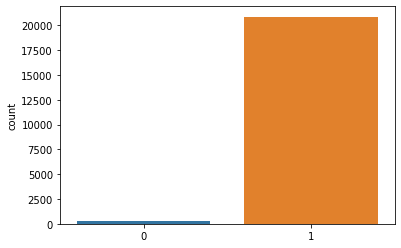

In [ ]:
final_pred_o = rfc.predict(df_test_scaled)
sns.countplot(final_pred_o)

In [ ]:
submission_over = {'id':ids, 'predicted':final_pred_o}
df_submission_o = pd.DataFrame(submission_over)

In [ ]:
df_submission_o.shape

(21183, 2)

In [ ]:
df_submission_o.to_csv('submission_02_1.csv', index=False)

In [ ]:
df_train_out_z.head()

,id,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29,var30,var31,var32,var33,var34,var35,var36,var37,var38,var39,var40,var41,var42,var43,var44,var45,var46,var47,var48,var49,var50,var51,var52,var53,var54,var55,var56,var57,var58,var59,var60,var61,var62,var63,var64,var65,var66,var67,var68,y
2,30,0,39,1019,10232,678,791,16,-999,3,63,9739,562,641,10,34,34,10,4,511,10,664,5,3,2,1,7,0,3,4,1,0,11,1,3,81,26,3,0,4,3,3,23,5,1,0,0,0,0,0,0,0,12,1,1,0.204636,0.213,0.451613,0.018639,0.214520,-999.000000,0.200814,0.051046,0.980827,0.018536,-999.00000,-999.00000,0.382353,0.242647,0
3,43,20,39,1751,2689,8235,1042,13,10,1,14,2890,6541,811,8,59,60,23,5,624,8,839,0,0,0,0,1,1,19,1,2,0,8,0,11,414,27,0,0,4,10,3,22,10,1,1,1,0,1,1,0,0,36,1,1,0.208299,0.716,0.101075,0.204753,0.349421,-999.000000,0.352379,0.044301,0.951564,0.023684,0.36337,0.00201,0.147059,0.132353,0
4,46,7,44,2262,29428,6031,304,16,-999,3,63,13541,7238,260,10,55,56,20,5,1413,10,270,2,3,2,1,8,1,3,4,1,0,17,4,3,567,8,3,2,4,5,3,26,5,1,0,0,0,0,1,0,0,19,1,1,0.222896,0.596,0.101075,0.140394,0.189641,0.021226,0.226161,0.059125,0.906155,0.020733,-999.00000,-999.00000,0.455882,0.132353,1
8,97,4,44,539,31622,50,2969,27,20,3,14,3359,8272,2292,19,22,22,10,4,1799,19,2422,5,3,0,1,7,1,25,4,1,0,20,4,30,9,31,7,0,4,10,3,19,9,1,0,0,0,0,0,0,0,16,3,1,0.204374,0.295,0.367742,0.067069,0.184499,0.160714,0.252895,0.050784,0.857719,0.015547,-999.00000,-999.00000,0.220588,0.143382,0
9,99,21,53,577,13528,1109,1746,35,27,3,63,13794,914,1317,26,1,3,3,3,1573,26,1372,5,3,2,4,1,0,24,4,2,0,16,5,58,591,2,2,0,4,4,3,26,7,1,0,0,0,0,0,1,0,15,1,1,0.206385,0.773,0.101075,0.131622,0.175693,-999.000000,0.492785,0.052694,0.891019,0.017476,-999.00000,-999.00000,0.161765,0.106618,0


In [ ]:
X_out = df_train_out_z.drop(['id', 'y'], axis = 1)
y_out = df_train_out_z['y']

In [ ]:
X_train_out, X_test_out, y_train_out, y_test_out = train_test_split(X_out, y_out, test_size=.33, random_state=5)

In [ ]:

scaler = StandardScaler()
X_train_scaled_out = scaler.fit_transform(X_train_out)
X_test_scaled_out = scaler.fit_transform(X_test_out)

In [ ]:
rfc_out = RandomForestClassifier(random_state=5)

In [ ]:
rfc_out.fit(X_train_scaled_out, y_train_out)
predictions_out = rfc_out.predict(X_test_out)
accuracy_score(y_test_out, predictions_out)

0.4161344537815126